In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import scipy

# data cleaning libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops = stopwords.words('english')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.feature_selection import RFE

from sklearn.naive_bayes import MultinomialNB,GaussianNB

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MJO11805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Tweets.csv')
df1 = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


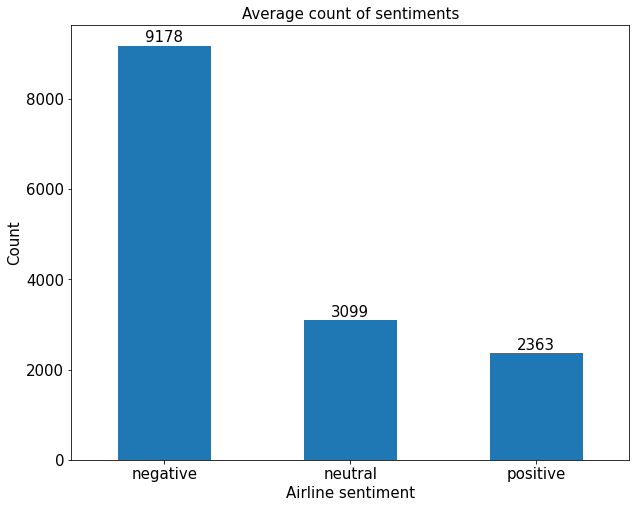

In [7]:
fig, ax = plt.subplots(figsize =(10,8))
plot = df.groupby('airline_sentiment')['airline_sentiment'].count().plot(kind = 'bar',fontsize=15,)
plt.xlabel('Airline sentiment',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Average count of sentiments',fontsize=15)
plt.xticks(rotation=0)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom',fontsize=15)

In [8]:
round(df['negativereason'].value_counts(normalize=True)*100,2)

Customer Service Issue         31.71
Late Flight                    18.14
Can't Tell                     12.97
Cancelled Flight                9.23
Lost Luggage                    7.89
Bad Flight                      6.32
Flight Booking Problems         5.76
Flight Attendant Complaints     5.24
longlines                       1.94
Damaged Luggage                 0.81
Name: negativereason, dtype: float64

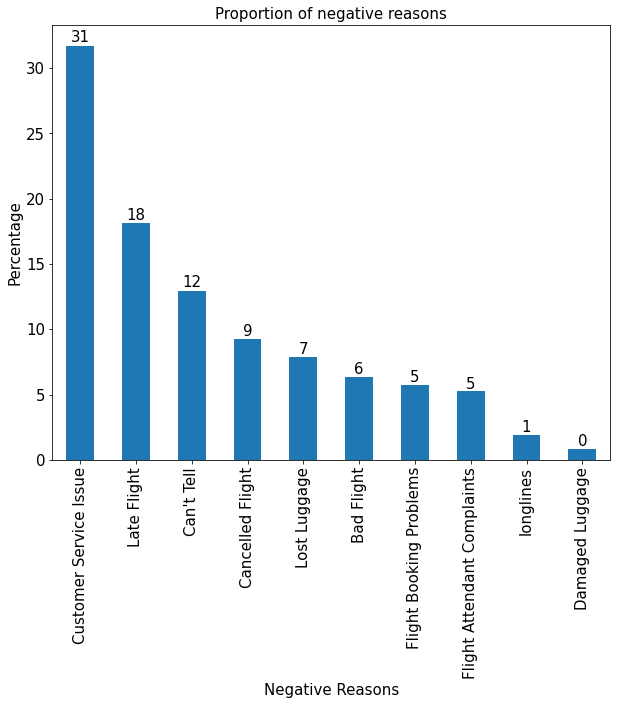

In [9]:
fig, ax = plt.subplots(figsize =(10,8))
plot = round(df['negativereason'].value_counts(normalize=True)*100,2).plot(kind = 'bar',fontsize=15,)
plt.xlabel('Negative Reasons',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Proportion of negative reasons',fontsize=15)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom',fontsize=15)

In [10]:
len(df['airline'].unique())

6

In [11]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [12]:
df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

In [13]:
df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count().idxmax()

('United', 'negative')

In [14]:
df.groupby(['airline','airline_sentiment'])['airline'].count().max()

2633

In [15]:
round(df['negativereason'].value_counts(normalize=True)*100,2).max()

31.71

In [16]:
df[['date','time']] = df['tweet_created'].str.split(' ',expand=True)

In [17]:
df.groupby(['date','airline_sentiment'])['airline_sentiment'].count()

date        airline_sentiment
16/02/2015  negative                3
            neutral                 1
17/02/2015  negative              838
            neutral               297
            positive              273
18/02/2015  negative              736
            neutral               335
            positive              273
19/02/2015  negative              751
            neutral               329
            positive              296
20/02/2015  negative              835
            neutral               383
            positive              282
21/02/2015  negative             1049
            neutral               278
            positive              230
22/02/2015  negative             2266
            neutral               463
            positive              350
23/02/2015  negative             1919
            neutral               676
            positive              433
24/02/2015  negative              781
            neutral               337
            positive

In [18]:
df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

In [19]:
df.corr()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024842,0.021531,-0.008853
airline_sentiment_confidence,0.024842,1.000000,0.685879,0.012581
negativereason_confidence,0.021531,0.685879,1.000000,0.021574
retweet_count,-0.008853,0.012581,0.021574,1.000000


In [20]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada),24/02/2015,11:35
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada),24/02/2015,11:15
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada),24/02/2015,11:15
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada),24/02/2015,11:15
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada),24/02/2015,11:14


In [21]:
df['timestamp'] = pd.to_datetime(df['tweet_created'])

In [22]:
df['timestamp_dayofweek']=df['timestamp'].dt.weekday

In [23]:
df['time'] = pd.to_datetime(df['time'],format='%H:%M').dt.hour

In [24]:
df['time'] = pd.cut(df['time'],bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
                    include_lowest=True,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [25]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'date', 'time', 'timestamp',
       'timestamp_dayofweek'],
      dtype='object')

In [26]:
df.drop(['tweet_id','airline_sentiment_gold','name','negativereason_gold','text','tweet_coord',
         'tweet_created','tweet_location','timestamp','date'],axis=1,inplace=True)

In [27]:
df['airline_sentiment'] = df['airline_sentiment'].replace({'positive':1,'neutral':2,'negative':3})

In [28]:
df['negativereason'].fillna('None',inplace=True)

In [29]:
le =LabelEncoder()

In [30]:
df['negativereason'] = le.fit_transform(df['negativereason'])

In [31]:
df.groupby(['airline_sentiment'])['negativereason_confidence'].sum()

airline_sentiment
1       0.0000
2       0.0000
3    6716.1745
Name: negativereason_confidence, dtype: float64

In [32]:
df['negativereason_confidence'].fillna('0.0000',inplace=True)

In [33]:
df['airline'] = le.fit_transform(df['airline'])

In [34]:
df['user_timezone'] = le.fit_transform(df['user_timezone'])

In [35]:
df.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'retweet_count',
       'user_timezone', 'time', 'timestamp_dayofweek'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   airline_sentiment             14640 non-null  int64   
 1   airline_sentiment_confidence  14640 non-null  float64 
 2   negativereason                14640 non-null  int32   
 3   negativereason_confidence     14640 non-null  object  
 4   airline                       14640 non-null  int32   
 5   retweet_count                 14640 non-null  int64   
 6   user_timezone                 14640 non-null  int32   
 7   time                          14640 non-null  category
 8   timestamp_dayofweek           14640 non-null  int64   
dtypes: category(1), float64(1), int32(3), int64(3), object(1)
memory usage: 758.6+ KB


In [37]:
df['negativereason_confidence']=pd.to_numeric(df['negativereason_confidence'])

In [38]:
df['time']=pd.to_numeric(df['time'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  int64  
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                14640 non-null  int32  
 3   negativereason_confidence     14640 non-null  float64
 4   airline                       14640 non-null  int32  
 5   retweet_count                 14640 non-null  int64  
 6   user_timezone                 14640 non-null  int32  
 7   time                          14640 non-null  int64  
 8   timestamp_dayofweek           14640 non-null  int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 857.9 KB


<AxesSubplot:>

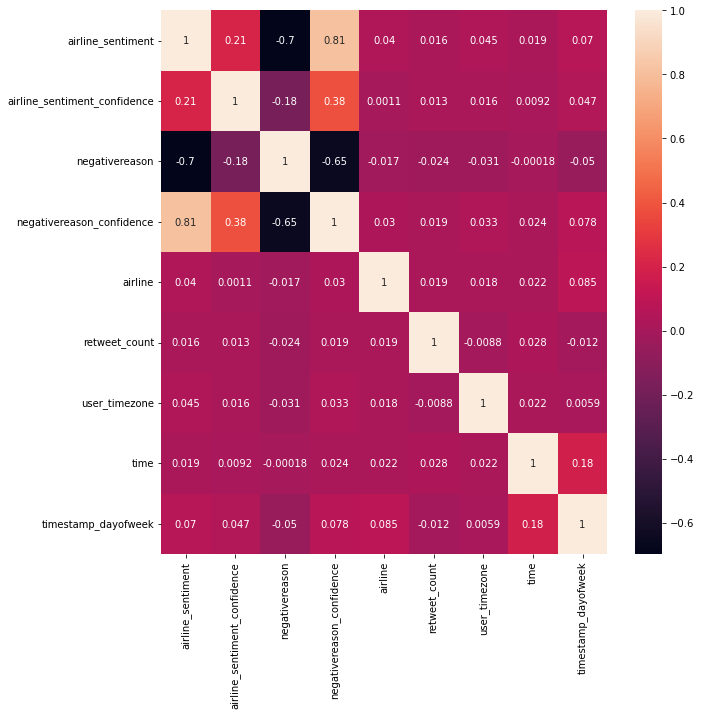

In [40]:
corr = df.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(corr,annot=True)

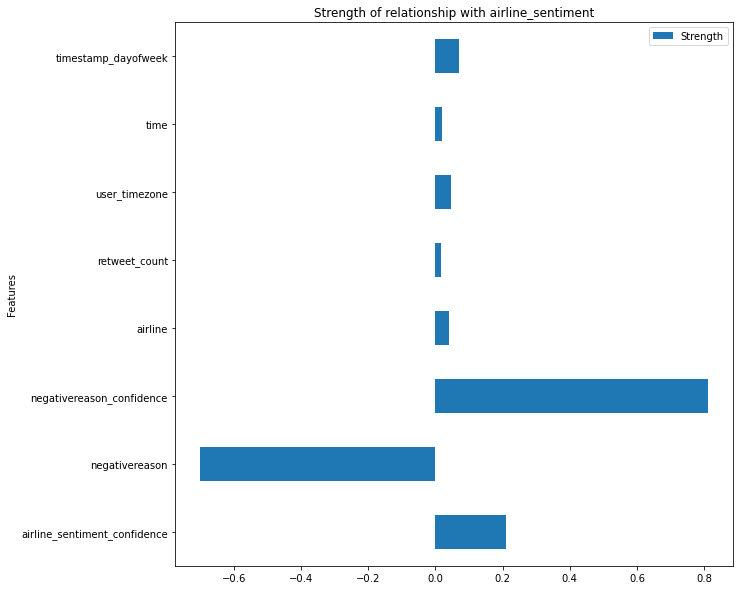

In [41]:
rel = {"Features": ['airline_sentiment_confidence', 'negativereason','negativereason_confidence',
                    'airline','retweet_count','user_timezone', 'time', 'timestamp_dayofweek'],
       "Strength":[0.21,-0.7,0.81,0.04,0.016,0.045,0.019,0.07]}
dataFrame  = pd.DataFrame(data = rel)
dataFrame.plot.barh(x='Features', y='Strength', title="Strength of relationship with airline_sentiment",figsize = (10,10))
plt.show(block=True)

## Deep learning

In [42]:
df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


### Important columns:
    1. airline_sentiment
    2. negativereason
    3. text

In [43]:
df= df1[['airline_sentiment','text']]

In [44]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [45]:
def clean_text(text):
    text= re.sub('[^A-Za-z]',' ',text)
    text =text.lower()
    words = text.split()
    imp_words = [w for w in words if w not in stops]
    
    return(' '.join(imp_words)) 

In [46]:
clean_text('I am Jessy')

'jessy'

In [47]:
df['clean_text'] = df['text'].apply(lambda x:clean_text(x))

In [48]:
df.head()

,airline_sentiment,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


In [49]:
df = df[['clean_text','airline_sentiment']]

In [50]:
df.head()

,clean_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


In [51]:
le = LabelEncoder()

In [52]:
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])

In [53]:
df.head()

,clean_text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plus added commercials experienc...,2
2,virginamerica today must mean need take anothe...,1
3,virginamerica really aggressive blast obnoxiou...,0
4,virginamerica really big bad thing,0


In [54]:
x= df['clean_text']
y=df['airline_sentiment']

## TF-ID Vectorisation

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=10)

In [56]:
tf = TfidfVectorizer()

In [57]:
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

In [58]:
len(tf.get_feature_names())

12685

In [59]:
x_train = scipy.sparse.csr_matrix.todense(x_train)

In [60]:
x_test = scipy.sparse.csr_matrix.todense(x_test)

In [61]:
x_train.shape

(13176, 12685)

## Deep learning model

In [62]:
model = Sequential([Dense(512,activation= 'relu',input_shape = (12685,)),
                    Dense(256,activation= 'sigmoid'), 
                   # Dense(256,activation= 'sigmoid'), 
                    Dense(3,activation = 'softmax') ])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6495232   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 6,627,331
Trainable params: 6,627,331
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [65]:
history = model.fit(x_train,y_train,epochs=5,batch_size=200,validation_data=(x_test,y_test))

Epoch 1/5
66/66 [==============================] - 6s 75ms/step - loss: 0.8361 - accuracy: 0.6261 - val_loss: 0.5979 - val_accuracy: 0.7794
Epoch 2/5
66/66 [==============================] - 4s 66ms/step - loss: 0.4279 - accuracy: 0.8461 - val_loss: 0.5313 - val_accuracy: 0.7971
Epoch 3/5
66/66 [==============================] - 4s 68ms/step - loss: 0.2578 - accuracy: 0.9118 - val_loss: 0.5695 - val_accuracy: 0.7883
Epoch 4/5
66/66 [==============================] - 4s 66ms/step - loss: 0.1718 - accuracy: 0.9460 - val_loss: 0.6312 - val_accuracy: 0.7828
Epoch 5/5
66/66 [==============================] - 4s 66ms/step - loss: 0.1223 - accuracy: 0.9632 - val_loss: 0.6936 - val_accuracy: 0.7821


## Performance plots

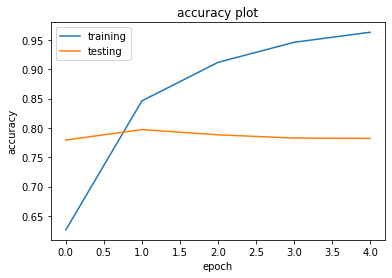

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(['training','testing'])

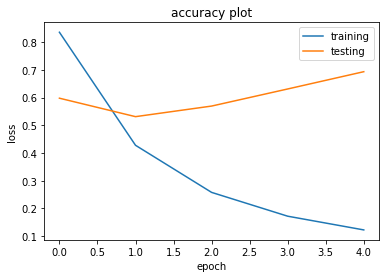

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('accuracy plot')
plt.legend(['training','testing'])

In [68]:
model.save('dlmodel.h5')